# First Step Data Cleaning

## Import Libraries

In [1]:

# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import graphviz
import pydot
from io import StringIO
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report


## Load Raw Data

In [3]:

# Load Raw Data
df = pd.read_csv("https://github.com/Bryanwang657/WFAA-Consulting-Project/raw/main/people-prism-fields-deidentified.csv")


## Overview of the Data

In [4]:

# Overview of the Data
print("First 40 rows of the dataset:")
print(df.head(40))


First 40 rows of the dataset:
   TransactionDate_first TransactionDate_last TransactionAmount_total  \
0                    NaN                  NaN                     NaN   
1                    NaN                  NaN                     NaN   
2              2018-2024            2019-2024           500.01-5000.0   
3              2013-2018            2015-2019              0.01-100.0   
4                    NaN                  NaN                     NaN   
5              1988-1993            2015-2019           500.01-5000.0   
6              2008-2013            2011-2015            100.01-500.0   
7                    NaN                  NaN                     NaN   
8                    NaN                  NaN                     NaN   
9                    NaN                  NaN                     NaN   
10             1983-1988            1994-1998            100.01-500.0   
11                   NaN                  NaN                     NaN   
12                   

## Check the Shape of the DataFrame

In [5]:

# Check the Shape of the DataFrame
print("Shape of the DataFrame:")
print(df.shape)


Shape of the DataFrame:
(52601, 158)


## Check for Missing Values

In [6]:

# Check for Missing Values
print("Missing values in each column:")
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
miss_value = df.isnull().sum()
print(miss_value)


Missing values in each column:
TransactionDate_first           27682
TransactionDate_last            27682
TransactionAmount_total         27682
AgeBin                              0
Transaction_count               28535
WSBEventsAttended                   0
spouse1_WSBAlum_Flag                0
HaveMade10PlusPledgeSequence        0
uuid                                0
N2NCY                           18109
N2BTN                           18093
N2TSC                           18093
N2BC                            18093
GEND                            17866
RACE                            17866
FAMP                            17866
POEP                            17866
ILOR                            17866
ESTDII30                        17866
APT                             17866
ESTINC30                        17866
MR                              17866
MOBPLUS                         17866
VETERAN                         17866
CA00                            17866
CA03               

## Drop Columns with More Than 40000 Missing Values

In [7]:

# Drop Columns with More Than 40000 Missing Values
columns_drop = miss_value[miss_value > 40000].index
df = df.drop(columns=columns_drop)
miss_value = df.isnull().sum()
print("Missing values after dropping columns with more than 40000 missing values:")
print(miss_value)


Missing values after dropping columns with more than 40000 missing values:
TransactionDate_first           27682
TransactionDate_last            27682
TransactionAmount_total         27682
AgeBin                              0
Transaction_count               28535
WSBEventsAttended                   0
spouse1_WSBAlum_Flag                0
HaveMade10PlusPledgeSequence        0
uuid                                0
N2NCY                           18109
N2BTN                           18093
N2TSC                           18093
N2BC                            18093
GEND                            17866
RACE                            17866
FAMP                            17866
POEP                            17866
ILOR                            17866
ESTDII30                        17866
APT                             17866
ESTINC30                        17866
MR                              17866
MOBPLUS                         17866
VETERAN                         17866
CA00         

## Drop Rows with All Values Missing in Specific Columns

In [8]:

# Drop Rows with All Values Missing in Specific Columns
df = df.dropna(subset=df.columns[df.columns.get_loc('N2NCY'):df.columns.get_loc('VHNUMBER') + 1], how='all')
print("Shape of the DataFrame after dropping rows with all values missing in specific columns:")
print(df.shape)


Shape of the DataFrame after dropping rows with all values missing in specific columns:
(34735, 151)


## Check for Missing Values After Cleaning

In [9]:

# Check for Missing Values After Cleaning
miss_value_clean = df.isnull().sum()
print("Missing values after cleaning:")
print(miss_value_clean)


Missing values after cleaning:
TransactionDate_first           15310
TransactionDate_last            15310
TransactionAmount_total         15310
AgeBin                              0
Transaction_count               16000
WSBEventsAttended                   0
spouse1_WSBAlum_Flag                0
HaveMade10PlusPledgeSequence        0
uuid                                0
N2NCY                             243
N2BTN                             227
N2TSC                             227
N2BC                              227
GEND                                0
RACE                                0
FAMP                                0
POEP                                0
ILOR                                0
ESTDII30                            0
APT                                 0
ESTINC30                            0
MR                                  0
MOBPLUS                             0
VETERAN                             0
CA00                                0
CA03               

## Data Types of the Columns

In [10]:

# Data Types of the Columns
print("Data types of the columns:")
print(df.dtypes)


Data types of the columns:
TransactionDate_first            object
TransactionDate_last             object
TransactionAmount_total          object
AgeBin                           object
Transaction_count                object
WSBEventsAttended                object
spouse1_WSBAlum_Flag             object
HaveMade10PlusPledgeSequence     object
uuid                             object
N2NCY                            object
N2BTN                           float64
N2TSC                           float64
N2BC                            float64
GEND                             object
RACE                             object
FAMP                             object
POEP                             object
ILOR                            float64
ESTDII30                        float64
APT                              object
ESTINC30                         object
MR                               object
MOBPLUS                          object
VETERAN                          object
CA00         

## Separate Donors and Non-Donors

In [11]:

# Separate Donors and Non-Donors
donor = df[df['TransactionAmount_total'].notna()]
df_non = df[df['TransactionAmount_total'].isna()]

print("Shape of donor DataFrame:")
print(donor.shape)


Shape of donor DataFrame:
(19425, 151)


## Save Donors and Non-Donors DataFrames to CSV

In [12]:

# Save Donors and Non-Donors DataFrames to CSV
df_non.to_csv('/non_donors.csv', index=False)
donor.to_csv('/donor.csv', index=False)


## Imputation of Missing Values

In [14]:

"""
Imputation of Missing Values
Use models to impute missing values.
"""

# Install CatBoost for Imputation (if necessary)
!pip install catboost

from catboost import CatBoostRegressor


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 7.0 MB/s eta 0:00:00


In [ ]:
donor['was_missing'] = donor['Transaction_count'].isnull()

In [31]:
from sklearn.model_selection import train_test_split

# filter rows which has missing value on transaction_count
data_with_target = donor[donor['Transaction_count'].notnull()]

# prepare for the x and y
features = ['TransactionDate_first', 'TransactionDate_last', 'TransactionAmount_total', 'AgeBin', 'WSBEventsAttended']
X = data_with_target[features]
y = data_with_target['Transaction_count']

# spilt the dataset into training_set and test_set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
from catboost import CatBoostClassifier

# set the model
model = CatBoostClassifier(iterations=1000, learning_rate=0.05, depth=6, verbose=200)

# train the model
model.fit(X_train, y_train, cat_features=np.where(X_train.dtypes == object)[0])

0:	learn: 1.9389253	total: 159ms	remaining: 2m 38s


KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import accuracy_score

# use test data to test the model
y_pred = model.predict(X_test)

# evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2%}")

In [ ]:
predict_data = donor[donor['Transaction_count'].isnull()][features]

predicted_counts = model.predict(predict_data)

# input our prediction value to their field
df1.loc[df1['Transaction_count'].isnull(), 'Transaction_count'] = predicted_counts

In [ ]:
filled_rows = donor[donor['was_missing'] == True]

## Function to Assign Scores Based on Transaction Date

In [19]:
def assign_numerical_value(TransactionDate_last):
    if TransactionDate_last == '1982-1986':
        return 1
    elif TransactionDate_last == '1986-1990':
        return 2
    elif TransactionDate_last == '1990-1994':
        return 3
    elif TransactionDate_last == '1994-1998':
        return 4
    elif TransactionDate_last == '1998-2003':
        return 5
    elif TransactionDate_last == '2003-2007':
        return 6
    elif TransactionDate_last == '2007-2011':
        return 7
    elif TransactionDate_last == '2011-2015':
        return 8
    elif TransactionDate_last == '2015-2019':
        return 9
    elif TransactionDate_last == '2019-2024':
        return 10
    else:
        return None

donor['TransactionDatelast_value'] = donor['TransactionDate_last'].apply(assign_numerical_value)

<ipython-input-19-47b1c3ca079a>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  donor['TransactionDatelast_value'] = donor['TransactionDate_last'].apply(assign_numerical_value)


In [20]:

# Function to Assign Scores Based on Transaction Date
def assign_score_value(TransactionDate_first):
    if TransactionDate_first == '1983-1988':
        return 8
    elif TransactionDate_first == '1988-1993':
        return 7
    elif TransactionDate_first == '1993-1998':
        return 6
    elif TransactionDate_first == '1998-2003':
        return 5
    elif TransactionDate_first == '2003-2008':
        return 4
    elif TransactionDate_first == '2008-2013':
        return 3
    elif TransactionDate_first == '2013-2018':
        return 2
    elif TransactionDate_first == '2018-2024':
        return 1
    else:
        return None

donor['TransactionDatefirst_value'] = donor['TransactionDate_first'].apply(assign_score_value)


<ipython-input-20-57e4b9896c4a>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  donor['TransactionDatefirst_value'] = donor['TransactionDate_first'].apply(assign_score_value)


## Function to Assign Scores Based on Transaction Amount

In [21]:

# Function to Assign Scores Based on Transaction Amount
def value(TransactionAmount_total):
    if TransactionAmount_total == '0.01-100.0':
        return 1
    elif TransactionAmount_total == '100.01-500.0':
        return 2
    elif TransactionAmount_total == '500.01-5000.0':
        return 3
    elif TransactionAmount_total == '5000.01-10000.0':
        return 4
    elif TransactionAmount_total == '10000.01-50000.0':
        return 5
    elif TransactionAmount_total == '50000.01-100000.0':
        return 6
    elif TransactionAmount_total == '100000.01-500000.0':
        return 7
    elif TransactionAmount_total == '500000.01-1000000.0':
        return 8
    elif TransactionAmount_total == '1000000.01-5000000.0':
        return 9
    else:
        return 0

donor['Amount_value'] = donor['TransactionAmount_total'].apply(value)


<ipython-input-21-3e7dcacf6ef3>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  donor['Amount_value'] = donor['TransactionAmount_total'].apply(value)


## Function to Assign Scores Based on Transaction Count


In [26]:
import pandas as pd

def map_to_score(range_str):

    if not isinstance(range_str, str):
        return None
    if range_str == "20-Nov":
        range_str = "11-20"

    parts = range_str.split("-")
    try:
        start = int(parts[0])
        end = int(parts[1]) if len(parts) > 1 else start
    except ValueError:
        return None

    ranges = [(0, 10), (11, 20), (21, 30), (31, 40), (41, 50), (51, 100), (101, 200), (201, 400)]
    scores = range(1, 9)

    for score, range_ in zip(scores, ranges):
        if start >= range_[0] and end <= range_[1]:
            return score
    return None


donor['Count_Value'] = donor['Transaction_count'].apply(map_to_score)

<ipython-input-26-39db8576fc19>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  donor['Count_Value'] = donor['Transaction_count'].apply(map_to_score)


## Calculate the Average Time Value

In [23]:

# Calculate the Average Time Value
donor['Time_value'] = (donor['TransactionDatefirst_value'] + donor['TransactionDatelast_value']) / 2

print("First few rows of donor DataFrame after calculating Time_value:")
print(donor.head())


First few rows of donor DataFrame after calculating Time_value:
   TransactionDate_first TransactionDate_last TransactionAmount_total  \
2              2018-2024            2019-2024           500.01-5000.0   
3              2013-2018            2015-2019              0.01-100.0   
5              1988-1993            2015-2019           500.01-5000.0   
10             1983-1988            1994-1998            100.01-500.0   
14             2003-2008            2015-2019         5000.01-10000.0   

            AgeBin Transaction_count WSBEventsAttended spouse1_WSBAlum_Flag  \
2   28 and Younger              0-10               0-4                    Y   
3            29-40              0-10               0-4                    Y   
5            69-78             21-30               0-4                    Y   
10           69-78              0-10               0-4                    Y   
14           41-54              0-10               0-4                    Y   

   HaveMade10PlusPledg

<ipython-input-23-67a7d17b5ce3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  donor['Time_value'] = (donor['TransactionDatefirst_value'] + donor['TransactionDatelast_value']) / 2


## Calculate FM+R Score

In [27]:

# Calculate FM+R Score
donor["FM+R_score"] = donor['Count_Value'] + donor['Amount_value'] + donor['Time_value']
donor.to_csv('/donor.csv', index=False)


<ipython-input-27-125f8f6229cc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  donor["FM+R_score"] = donor['Count_Value'] + donor['Amount_value'] + donor['Time_value']


## Visualize the FM+R Score Distribution

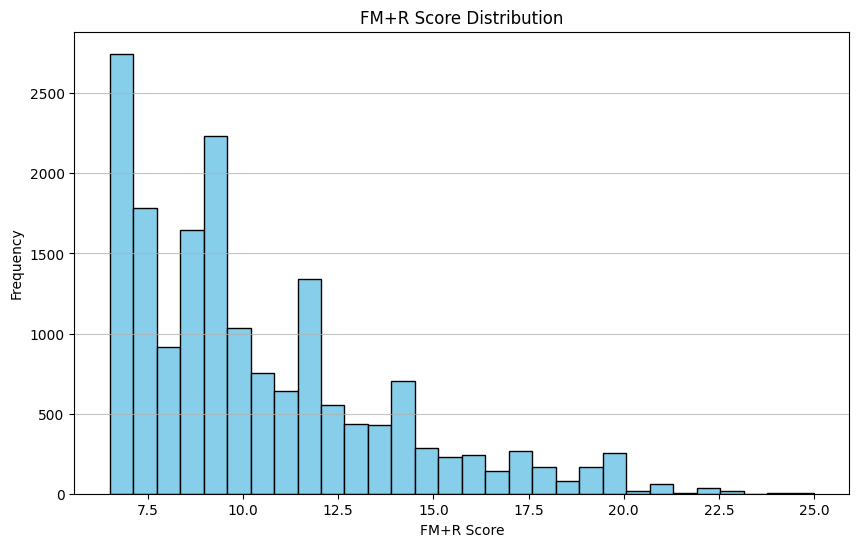

In [29]:

# Visualize the FM+R Score Distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(donor['FM+R_score'], bins=30, color='skyblue', edgecolor='black')
plt.title('FM+R Score Distribution')
plt.xlabel('FM+R Score')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

plt.show()


In [30]:
donor.head()

,TransactionDate_first,TransactionDate_last,TransactionAmount_total,AgeBin,Transaction_count,WSBEventsAttended,spouse1_WSBAlum_Flag,HaveMade10PlusPledgeSequence,uuid,N2NCY,N2BTN,N2TSC,N2BC,GEND,RACE,FAMP,POEP,ILOR,ESTDII30,APT,ESTINC30,MR,MOBPLUS,VETERAN,CA00,CA03,CA06,CA11,CA16,N2ALV,NETW30,PRESSURV,CDB1,CDB2,CDB3,CDB4,VOTE,HTFH,BOAT,SGDI,SGFA,SGHL,SGLL,SGOE,SGPA,SGSE,SGTC,SGUP,INSHOP,CONSHOP,HHCOMP,AIRCRAFT,PILOTS,ATV,SNOW,CCW,DESTGRP,DEVICE,ONLINE,DIGIPLAY,C210MYS,C210MAH,C210PWH,C210PHI,C210PBL,C210HMI,C210CIP,C210POO,C210HVA,C210PSU,C210MOB,C210BLU,C210WHT,C210PMR,C210PWC,C210AUTO,C210EBI,C210PDV,C210PMV,C210APVT,C210BPVT,C210M200,C210B200,C210KSES,C210PDSC,C210PDUC,STLINDEX,STLNINDX,DNRINDX,DIANIMAL,DIARTS,DICHLD,DICNSRV,DIENV,DIHLTH,DIHUMN,DILIB,DIREL,DIVET,TSCONS,TSCOST,TSDBOOK,TSLOYAL,TSLUX,TSAFFN,ALTRUIST,GENERS20,HXMBOH,HXMH,HXMIOC,HXWEARBL,CHANPR1,CHANPR2,CHANPRC,CHANPRE,CHANPRM,CHANPRP,CHANPRT,CHANPRW,HMVLADD,LNVLRTIO,ESTDIS30,ESTDEB30,ESTINV30,INVEXPL,INVRISKT,INVRETIR,INVEQ,INVCASH,INVINSUR,INVRECOM,INVPROF,INVSELFD,SAVERSST,SAVERSLT,FTOTVLCL,FLNDVALC,FSALDATE,FSALPRIC,FMORT1,FMORTTYP,FMORTTRM,FMORT2,FLIVSQFT,FYEARBLT,FEFFYRBL,FPOOL,FROOFCVR,LNDSQFT,INVESTOR,VHNUMBER,TransactionDatefirst_value,Amount_value,TransactionDatelast_value,Time_value,Count_Value,FM+R_score
2,2018-2024,2019-2024,500.01-5000.0,28 and Younger,0-10,0-4,Y,N,2709eca5-26c0-4b1c-a433-5caa9ff77bda,C,9709.0,0.0,2022.0,M,U,H,U,15.0,3.0,S,I,U,U,U,0.0,0.0,0.0,4.0,4.0,B,H,U,200908.0,200507.0,0.0,0.0,Y,Y,U,U,U,U,U,U,U,U,U,U,U,U,A,U,U,U,U,U,2.0,12.0,34.0,7.0,4.0,54.0,95.0,3.0,0.0,82.0,74.0,76.0,270.0,89.0,6.0,24.0,55.0,62.0,37.0,22.0,65.0,14.0,99.0,97.0,3.0,22.0,15.0,92.0,72.0,83.0,7.0,5.0,U,U,U,U,U,U,U,U,U,U,U,7.0,7.0,6.0,6.0,6.0,6.0,7.0,G7,8.0,4.0,8.0,6.0,E,P,8.0,6.0,7.0,5.0,6.0,4.0,0.0,0.0,12.0,C,F,M,M,3.0,3.0,3.0,3.0,3.0,3.0,2.0,5.0,2.0,U,U,0.0,U,U,U,0.0,U,U,0.0,0.0,U,U,U,U,8.0,1.0,3,10,5.5,1.0,9.5
3,2013-2018,2015-2019,0.01-100.0,29-40,0-10,0-4,Y,N,a092d459-42b2-46b0-9df1-7f2c43d60096,A,253.0,0.0,2000.0,F,U,O,U,1.0,9.0,A,D,M,M,U,0.0,0.0,0.0,0.0,0.0,B,A,U,0.0,0.0,0.0,0.0,Y,Y,U,U,U,U,U,U,U,U,U,U,U,Y,U,U,U,U,U,U,1.0,2.0,24.0,1.0,4.0,50.0,29.0,21.0,52.0,57.0,31.0,21.0,927.0,7.0,0.0,8.0,56.0,27.0,23.0,5.0,45.0,17.0,45.0,81.0,19.0,14.0,11.0,94.0,18.0,1.0,9.0,1.0,U,U,U,U,U,U,U,U,U,U,U,5.0,7.0,6.0,6.0,8.0,7.0,4.0,M5,0.0,1.0,1.0,3.0,C,T,2.0,8.0,9.0,9.0,3.0,5.0,0.0,0.0,28.0,A,A,B,M,8.0,9.0,8.0,9.0,9.0,9.0,8.0,1.0,5.0,U,U,0.0,U,U,U,0.0,U,U,0.0,0.0,U,U,U,U,0.0,2.0,1,9,5.5,1.0,7.5
5,1988-1993,2015-2019,500.01-5000.0,69-78,21-30,0-4,Y,N,a880b47e-f87f-474c-81f9-3451315a3caf,C,4.0,0.0,3006.0,M,U,H,U,4.0,2.0,B,C,M,M,U,0.0,0.0,0.0,0.0,0.0,B,A,U,0.0,0.0,0.0,0.0,Y,U,U,U,U,U,U,U,U,U,U,U,U,U,B,U,U,U,U,U,6.0,2.0,27.0,5.0,4.0,71.0,95.0,6.0,0.0,39.0,10.0,34.0,172.0,68.0,0.0,6.0,29.0,25.0,14.0,19.0,33.0,10.0,83.0,88.0,12.0,20.0,4.0,76.0,22.0,34.0,7.0,7.0,Y,U,U,U,U,U,U,U,U,U,U,9.0,7.0,6.0,7.0,7.0,5.0,8.0,L6,9.0,8.0,7.0,9.0,E,C,5.0,7.0,5.0,3.0,9.0,6.0,0.0,0.0,52.0,B,A,B,L,8.0,6.0,5.0,4.0,5.0,7.0,5.0,8.0,9.0,U,U,0.0,U,U,U,0.0,U,U,0.0,0.0,U,U,U,U,0.0,7.0,3,9,8.0,3.0,14.0
10,1983-1988,1994-1998,100.01-500.0,69-78,0-10,0-4,Y,N,0749d105-a79b-4daa-b6bc-b939b22fc6b8,B,96.0,0.0,1000.0,M,U,H,Y,3.0,8.0,A,C,Y,Y,U,0.0,0.0,0.0,0.0,0.0,B,G,U,0.0,0.0,0.0,0.0,Y,U,Y,U,U,U,U,U,U,U,U,U,Y,U,B,U,U,U,U,U,6.0,10.0,33.0,14.0,4.0,49.0,55.0,17.0,30.0,51.0,34.0,36.0,111.0,29.0,0.0,16.0,63.0,23.0,25.0,14.0,46.0,15.0,89.0,84.0,16.0,10.0,3.0,88.0,15.0,27.0,6.0,8.0,Y,U,U,U,U,U,U,U,U,U,U,6.0,6.0,6.0,6.0,6.0,3.0,8.0,L5,7.0,8.0,6.0,9.0,E,C,5.0,2.0,5.0,4.0,8.0,9.0,0.0,0.0,26.0,B,D,M,L,7.0,4.0,2.0,2.0,3.0,3.0,2.0,8.0,9.0,G,C,201908.0,H,U,U,0.0,U,D,1980.0,0.0,U,A,R,U,1.0,8.0,2,4,6.0,1.0,9.0
14,2003-2008,2015-2019,5000.01-10000.0,41-54,0-10,0-4,Y,N,10ae38ff-6fe6-4a8c-8ccd-1cfcd7bceffa,A,633.0,2.0,3000.0,F,U,O,U,15.0,9.0,A,H,U,U,U,0.0,0.0,0.0,0.0,0.0,B,I,U,0.0,0.0,0.0,0.0,U,U,U,U,U,U,U,U,U,U,U,U,U,U,U,U,U,U,U,U,13.0,16.0,36.0,16.0,6.0,32.0,86.0,7.0,3.0,69.0,50.0,5.0,383.0,0.0,0.0,2.0,96.0,13.0,2.0,3.0,58.0,10.0,5

# Second Step Data Analysis


This script performs the second step of our data analysis, including:
1. Defining the population of donors.
2. Analyzing the age trend among our donors.
3. Clustering analysis using K-Means and DBSCAN.
    

In [ ]:

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score


In [ ]:

# Load dataset
df = pd.read_csv('https://github.com/Bryanwang657/WFAA-Consulting-Project/raw/main/data%20(1)%201.csv')
print(df.head())


In [34]:

# Define donor type based on RFM score
df['donors type'] = df['RFM Score'].apply(lambda x: 'ACC' if x <= 12 else 'other')
print(df.head())


   Unnamed: 0 TransactionDate_first TransactionDate_last  \
0           1             2018-2024            2019-2024   
1           2             2013-2018            2015-2019   
2           4             1988-1993            2015-2019   
3           8             1983-1988            1994-1998   
4          12             2003-2008            2015-2019   

  TransactionAmount_total          AgeBin Transaction_count WSBEventsAttended  \
0           500.01-5000.0  28 and Younger              0-10               0-4   
1              0.01-100.0           29-40              0-10               0-4   
2           500.01-5000.0           69-78             21-30               0-4   
3            100.01-500.0           69-78              0-10               0-4   
4         5000.01-10000.0           41-54              0-10               0-4   

  spouse1_WSBAlum_Flag HaveMade10PlusPledgeSequence  \
0                    Y                            N   
1                    Y                    

# K-mean

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

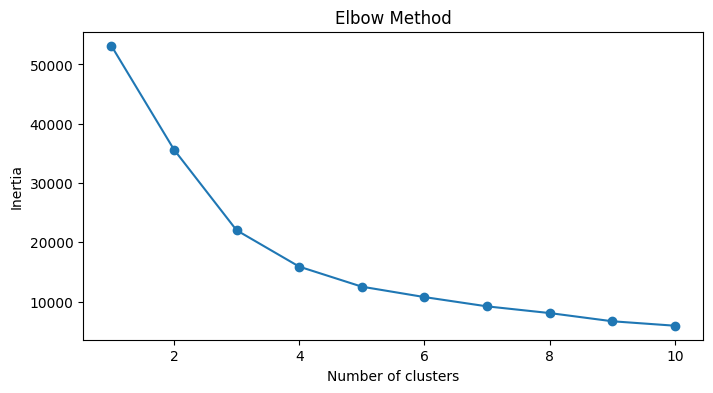

In [35]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd

data_acc = df[df['donors type'] == 'ACC']

features = data_acc[['Recency Score', 'Monetary score', 'Frequency score', 'firstdata value']]

# standarize
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# choose the best k value
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

# see the performance in each cluster
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [36]:
k =4
kmeans = KMeans(n_clusters=k, random_state=42)
data_acc['Cluster'] = kmeans.fit_predict(features_scaled)

print(data_acc[['Recency Score', 'Monetary score', 'Frequency score', 'firstdata value', 'Cluster']].head())

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


   Recency Score  Monetary score  Frequency score  firstdata value  Cluster
0             10               3                1                1        1
1              9               1                1                2        2
3              4               2                1                8        3
4              9               4                1                4        1
5              8               2                1                7        1


<ipython-input-36-08704c541f57>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_acc['Cluster'] = kmeans.fit_predict(features_scaled)


In [37]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score



# silhouette Index
silhouette_avg = silhouette_score(features_scaled, data_acc['Cluster'])
print("Silhouette Score: ", silhouette_avg)

# Calinski-Harabasz Index
calinski_harabasz_avg = calinski_harabasz_score(features_scaled, data_acc['Cluster'])
print("Calinski-Harabasz Index: ", calinski_harabasz_avg)

# Davies-Bouldin Index
davies_bouldin_avg = davies_bouldin_score(features_scaled, data_acc['Cluster'])
print("Davies-Bouldin Index: ", davies_bouldin_avg)

Silhouette Score:  0.3973508301492291
Calinski-Harabasz Index:  10390.862903672802
Davies-Bouldin Index:  0.928402124626286


In [38]:
# evaluate the mean

selected_means = data_acc.groupby('Cluster')[['Recency Score', 'Monetary score', 'Frequency score', 'firstdata value']].mean()
print("\n:\n", selected_means)


:
          Recency Score  Monetary score  Frequency score  firstdata value
Cluster                                                                 
0             7.428571        2.835807         2.012059         5.902597
1             8.331079        2.610143         1.000000         4.655397
2             8.515408        1.350260         1.000000         2.415582
3             3.812816        1.542675         1.000000         7.137463


# DBSCAN

In [39]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import pandas as pd



data = df[df['donors type'] == 'ACC']

# select the feature
features = data[['Recency Score', 'Monetary score', 'Frequency score', 'firstdata value']]

# standarize
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# apply DBSCAN clustering

dbscan = DBSCAN(eps=1, min_samples=20)
clusters = dbscan.fit_predict(features_scaled)


data['Cluster'] = clusters


print(data[['Recency Score', 'Monetary score', 'Frequency score', 'firstdata value', 'Cluster']].head())


   Recency Score  Monetary score  Frequency score  firstdata value  Cluster
0             10               3                1                1        0
1              9               1                1                2        1
3              4               2                1                8        2
4              9               4                1                4        3
5              8               2                1                7        2


<ipython-input-39-358f96a66698>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cluster'] = clusters


In [40]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score


valid_labels = clusters[clusters != -1]
valid_features = features_scaled[clusters != -1]
silhouette_avg = silhouette_score(valid_features, valid_labels)
print("Silhouette Score: ", silhouette_avg)


calinski_harabasz_avg = calinski_harabasz_score(valid_features, valid_labels)
print("Calinski-Harabasz Index: ", calinski_harabasz_avg)


davies_bouldin_avg = davies_bouldin_score(valid_features, valid_labels)
print("Davies-Bouldin Index: ", davies_bouldin_avg)

Silhouette Score:  0.21987266021801224
Calinski-Harabasz Index:  2829.1546973259365
Davies-Bouldin Index:  1.61682415671348


# Conclusion: Choose k-mean clustering

***The K-Means clustering algorithm was chosen due to the following reasons:***

Consistency and Stability: The K-Means algorithm provided consistent clusters across different runs with minimal variance in the cluster centroids.

Interpretability: The clusters generated by K-Means were more interpretable and meaningful, as evidenced by the clear differentiation in the mean values of the features across clusters.

Performance Metrics: The K-Means algorithm showed a reasonable Silhouette Score and Davies-Bouldin Index, indicating a good balance between cohesion (how closely related data points in a cluster are) and separation (how distinct a cluster is from other clusters).

***The DBSCAN clustering algorithm did not perform as well due to the following reasons:***

Handling of Noise: DBSCAN tends to label many points as noise (-1), which can lead to loss of valuable data points in clusters. This was evident in the higher noise points identified during the analysis.

Cluster Size Imbalance: DBSCAN created clusters of very different sizes, some of which were very small, making it difficult to interpret and analyze the clusters effectively.

Metric Scores: Although DBSCAN provided similar metric scores to K-Means, the interpretability and usability of the clusters were lower, leading to the preference for K-Means.
